## Import

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
import warnings

In [169]:
#Read Dataset
path = r'C:\Users\Harun Ismail\full data X.csv'
df = pd.read_csv(path)

In [170]:
df

,V_a,I_a,kW_a,kVAR_a,kVA_a,PF_a,kWh_a,kVARh_a,kVAh_a,V_b,...,kVAR_tot,kVA_tot,PF_tot,kWh_tot,kVARh_tot,kVAh_tot,Freq_a,Freq_b,Freq_c,Freq_Max
0,221.139500,4.940850,0.540050,0.322900,0.629220,0.858280,0.013790,0.008420,0.016160,222.714400,...,0.935230,1.506520,0.783980,0.030190,0.024010,0.038570,59.995310,59.995310,59.995310,59.995310
1,220.967900,4.916240,0.540050,0.322510,0.629010,0.858560,0.013940,0.008510,0.016340,222.762200,...,0.934910,1.506320,0.784080,0.030520,0.024270,0.038990,59.981250,59.995310,60.009380,60.009380
2,221.135500,4.937170,0.540050,0.322510,0.629010,0.858560,0.014090,0.008600,0.016510,222.799200,...,0.934580,1.506120,0.784190,0.030850,0.024520,0.039410,59.995310,59.981250,59.995310,59.995310
3,221.027800,4.921790,0.540150,0.322340,0.629010,0.858720,0.014240,0.008690,0.016690,222.552600,...,0.934260,1.505920,0.784290,0.031180,0.024780,0.039820,59.995310,59.981250,59.981250,59.995310
4,221.080900,4.930770,0.540350,0.322000,0.629010,0.859040,0.014390,0.008780,0.016860,222.604400,...,0.933970,1.505810,0.784410,0.031500,0.025040,0.040240,59.995310,59.995310,59.981250,59.995310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,220.875710,4.883667,0.530649,0.324985,0.622260,0.852778,0.077763,0.049191,0.092289,222.417723,...,0.925137,1.471219,0.777546,0.168804,0.138806,0.218725,60.015064,60.029140,60.026346,60.029140
1244,220.478850,4.912475,0.533288,0.329738,0.626997,0.850550,0.074671,0.047300,0.088661,221.836035,...,0.928247,1.471658,0.775991,0.162132,0.133411,0.210142,59.939130,59.939130,59.939130,59.939130
1245,220.655061,4.875231,0.531869,0.327089,0.624401,0.851811,0.075667,0.047906,0.089827,222.289476,...,0.925991,1.470985,0.777002,0.164264,0.135140,0.212893,59.955753,59.953160,59.941719,59.955753
1246,220.624691,4.861694,0.530269,0.324689,0.621780,0.852823,0.078523,0.049656,0.093182,222.292966,...,0.923592,1.469843,0.777920,0.170442,0.140132,0.220835,60.033403,60.027577,60.033403,60.037530


In [171]:
print(df.tail()), print(df.head())

             V_a       I_a      kW_a    kVAR_a     kVA_a      PF_a     kWh_a  \
1243  220.875710  4.883667  0.530649  0.324985  0.622260  0.852778  0.077763   
1244  220.478850  4.912475  0.533288  0.329738  0.626997  0.850550  0.074671   
1245  220.655061  4.875231  0.531869  0.327089  0.624401  0.851811  0.075667   
1246  220.624691  4.861694  0.530269  0.324689  0.621780  0.852823  0.078523   
1247  220.524192  4.913221  0.533080  0.329536  0.626710  0.850598  0.074739   

       kVARh_a    kVAh_a         V_b  ...  kVAR_tot   kVA_tot    PF_tot  \
1243  0.049191  0.092289  222.417723  ...  0.925137  1.471219  0.777546   
1244  0.047300  0.088661  221.836035  ...  0.928247  1.471658  0.775991   
1245  0.047906  0.089827  222.289476  ...  0.925991  1.470985  0.777002   
1246  0.049656  0.093182  222.292966  ...  0.923592  1.469843  0.777920   
1247  0.047339  0.088738  221.877397  ...  0.927876  1.471471  0.776128   

       kWh_tot  kVARh_tot  kVAh_tot     Freq_a     Freq_b     Freq_c

(None, None)

<Axes: >

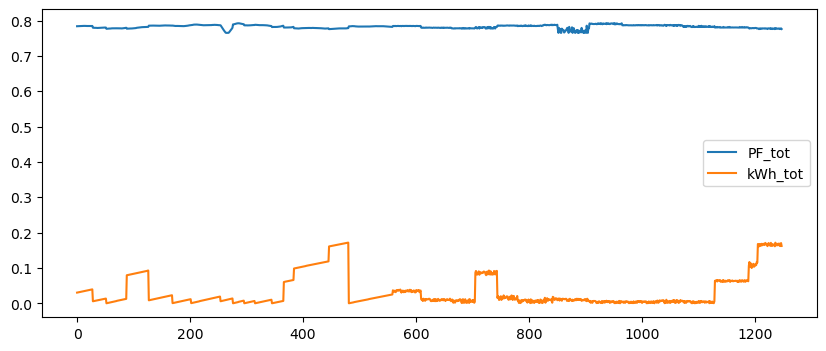

In [172]:
df = df[['PF_tot', 'kWh_tot']]
df.plot(figsize=(10,4))

In [173]:
df = pd.DataFrame(df)
df

,PF_tot,kWh_tot
0,0.783980,0.030190
1,0.784080,0.030520
2,0.784190,0.030850
3,0.784290,0.031180
4,0.784410,0.031500
...,...,...
1243,0.777546,0.168804
1244,0.775991,0.162132
1245,0.777002,0.164264
1246,0.777920,0.170442


In [174]:
df['kWh_tot'], df['PF_tot']

(0       0.030190
 1       0.030520
 2       0.030850
 3       0.031180
 4       0.031500
           ...   
 1243    0.168804
 1244    0.162132
 1245    0.164264
 1246    0.170442
 1247    0.162277
 Name: kWh_tot, Length: 1248, dtype: float64,
 0       0.783980
 1       0.784080
 2       0.784190
 3       0.784290
 4       0.784410
           ...   
 1243    0.777546
 1244    0.775991
 1245    0.777002
 1246    0.777920
 1247    0.776128
 Name: PF_tot, Length: 1248, dtype: float64)

In [175]:
df['PF_tot_next1'] = df['PF_tot'].shift(+1)
df['PF_tot_next2'] = df['PF_tot'].shift(+2)
df['PF_tot_next3'] = df['PF_tot'].shift(+3)

In [176]:
df

,PF_tot,kWh_tot,PF_tot_next1,PF_tot_next2,PF_tot_next3
0,0.783980,0.030190,NaN,NaN,NaN
1,0.784080,0.030520,0.783980,NaN,NaN
2,0.784190,0.030850,0.784080,0.783980,NaN
3,0.784290,0.031180,0.784190,0.784080,0.783980
4,0.784410,0.031500,0.784290,0.784190,0.784080
...,...,...,...,...,...
1243,0.777546,0.168804,0.776956,0.777619,0.776997
1244,0.775991,0.162132,0.777546,0.776956,0.777619
1245,0.777002,0.164264,0.775991,0.777546,0.776956
1246,0.777920,0.170442,0.777002,0.775991,0.777546


In [177]:
df = df.dropna()
df

,PF_tot,kWh_tot,PF_tot_next1,PF_tot_next2,PF_tot_next3
3,0.784290,0.031180,0.784190,0.784080,0.783980
4,0.784410,0.031500,0.784290,0.784190,0.784080
5,0.784430,0.031830,0.784410,0.784290,0.784190
6,0.784550,0.032160,0.784430,0.784410,0.784290
7,0.784580,0.032490,0.784550,0.784430,0.784410
...,...,...,...,...,...
1243,0.777546,0.168804,0.776956,0.777619,0.776997
1244,0.775991,0.162132,0.777546,0.776956,0.777619
1245,0.777002,0.164264,0.775991,0.777546,0.776956
1246,0.777920,0.170442,0.777002,0.775991,0.777546


In [178]:
LR_model = LinearRegression()
KNN_model = KNeighborsRegressor()
DT_model = DecisionTreeRegressor()
RF_model = RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)
GB_model = GradientBoostingRegressor()
SVM_model = SVR()

In [179]:
x1, x2, x3, y = df['PF_tot_next1'], df['PF_tot_next2'], df['PF_tot_next3'], df['PF_tot']

In [180]:
x1

3       0.784190
4       0.784290
5       0.784410
6       0.784430
7       0.784550
          ...   
1243    0.776956
1244    0.777546
1245    0.775991
1246    0.777002
1247    0.777920
Name: PF_tot_next1, Length: 1245, dtype: float64

In [181]:
x1[:5], x2[:5], x3[:5], y

(3    0.78419
 4    0.78429
 5    0.78441
 6    0.78443
 7    0.78455
 Name: PF_tot_next1, dtype: float64,
 3    0.78408
 4    0.78419
 5    0.78429
 6    0.78441
 7    0.78443
 Name: PF_tot_next2, dtype: float64,
 3    0.78398
 4    0.78408
 5    0.78419
 6    0.78429
 7    0.78441
 Name: PF_tot_next3, dtype: float64,
 3       0.784290
 4       0.784410
 5       0.784430
 6       0.784550
 7       0.784580
           ...   
 1243    0.777546
 1244    0.775991
 1245    0.777002
 1246    0.777920
 1247    0.776128
 Name: PF_tot, Length: 1245, dtype: float64)

In [182]:
x1, x2, x3, y = np.array(x1), np.array(x2), np.array(x3), np.array(y)

In [183]:
x1.shape, x2.shape, x3.shape, y.shape

((1245,), (1245,), (1245,), (1245,))

In [184]:
x1, x2, x3, y

(array([0.78419   , 0.78429   , 0.78441   , ..., 0.77599088, 0.77700227,
        0.77792038]),
 array([0.78408   , 0.78419   , 0.78429   , ..., 0.77754577, 0.77599088,
        0.77700227]),
 array([0.78398   , 0.78408   , 0.78419   , ..., 0.77695633, 0.77754577,
        0.77599088]),
 array([0.78429   , 0.78441   , 0.78443   , ..., 0.77700227, 0.77792038,
        0.77612832]))

In [185]:
x1, x2, x3, y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), y.reshape(-1,1) 

In [186]:
x1.shape, x2.shape, x3.shape, y.shape

((1245, 1), (1245, 1), (1245, 1), (1245, 1))

In [187]:
x1, x2, x3, y

(array([[0.78419   ],
        [0.78429   ],
        [0.78441   ],
        ...,
        [0.77599088],
        [0.77700227],
        [0.77792038]]),
 array([[0.78408   ],
        [0.78419   ],
        [0.78429   ],
        ...,
        [0.77754577],
        [0.77599088],
        [0.77700227]]),
 array([[0.78398   ],
        [0.78408   ],
        [0.78419   ],
        ...,
        [0.77695633],
        [0.77754577],
        [0.77599088]]),
 array([[0.78429   ],
        [0.78441   ],
        [0.78443   ],
        ...,
        [0.77700227],
        [0.77792038],
        [0.77612832]]))

In [188]:
final_x = np.concatenate((x1, x2, x3), axis=1)

In [189]:
# scaler = RobustScaler()
scaler = MinMaxScaler()
final_x = scaler.fit_transform(final_x)

In [190]:
final_x

array([[0.70007369, 0.69602063, 0.69233604],
       [0.70375829, 0.70007369, 0.69602063],
       [0.70817981, 0.70375829, 0.70007369],
       ...,
       [0.39796918, 0.45526046, 0.43354218],
       [0.43523468, 0.39796918, 0.45526046],
       [0.46906326, 0.43523468, 0.39796918]])

In [191]:
# X_train, X_test, y_train, y_test = final_x[:-30], final_x[-30:], y[:-30].ravel(), y[-30:].ravel()
X_train, X_test, y_train, y_test = final_x[:-30], final_x[-30:], y[:-30].ravel(), y[-30:].ravel()

In [192]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1215, 3), (30, 3), (1215,), (30,))

In [193]:
# X_train, X_test, y_train, y_test = X_train.reshape(1, -1), X_test.reshape(1, -1), y_train.reshape(1, -1), y_test.reshape(1, -1)

In [194]:
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [195]:
LR_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
DT_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)
GB_model.fit(X_train, y_train)
SVM_model.fit(X_train, y_train)

SVR()

In [196]:
pred = LR_model.predict(X_test)
pred2 = KNN_model.predict(X_test)
pred3 = DT_model.predict(X_test)
pred4 = RF_model.predict(X_test)
pred5 = GB_model.predict(X_test)
pred6 = SVM_model.predict(X_test)

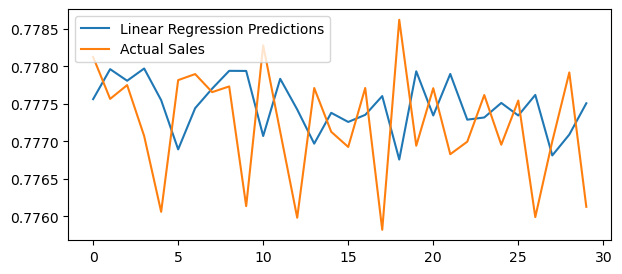

In [197]:
plt.rcParams['figure.figsize'] = (7,3)
plt.plot(pred, label='Linear Regression Predictions')
plt.plot(y_test, label='Actual Sales')
plt.legend(loc='upper left')
plt.show()

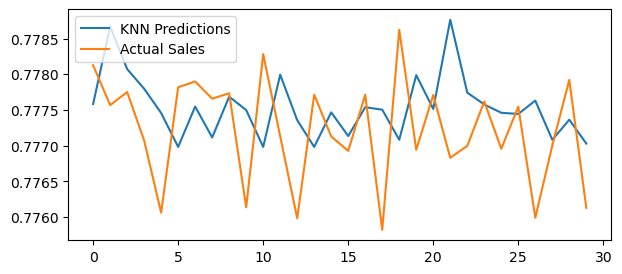

In [198]:
plt.rcParams['figure.figsize'] = (7,3)
plt.plot(pred2, label='KNN Predictions')
plt.plot(y_test, label='Actual Sales')
plt.legend(loc='upper left')
plt.show()

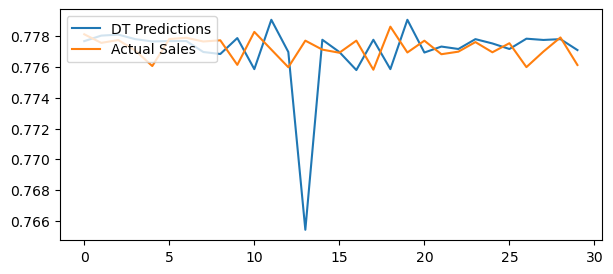

In [199]:
plt.rcParams['figure.figsize'] = (7,3)
plt.plot(pred3, label='DT Predictions')
plt.plot(y_test, label='Actual Sales')
plt.legend(loc='upper left')
plt.show()

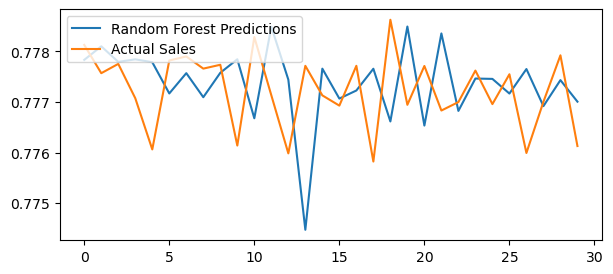

In [200]:
plt.rcParams['figure.figsize'] = (7,3)
plt.plot(pred4, label='Random Forest Predictions')
plt.plot(y_test, label='Actual Sales')
plt.legend(loc='upper left')
plt.show()

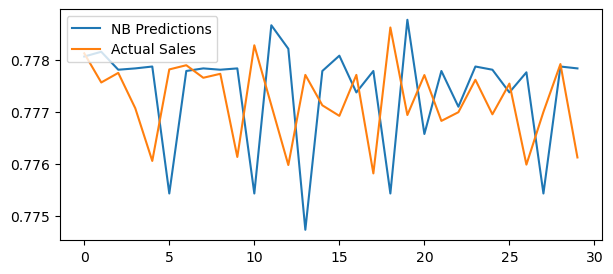

In [201]:
plt.rcParams['figure.figsize'] = (7,3)
plt.plot(pred5, label='NB Predictions')
plt.plot(y_test, label='Actual Sales')
plt.legend(loc='upper left')
plt.show()

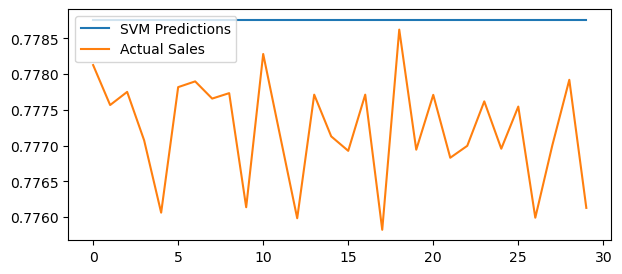

In [202]:
plt.rcParams['figure.figsize'] = (7,3)
plt.plot(pred6, label='SVM Predictions')
plt.plot(y_test, label='Actual Sales')
plt.legend(loc='upper left')
plt.show()

In [203]:
#Performance metrics
rmse_LR = sqrt(mean_squared_error(pred, y_test))
rmse_KNN = sqrt(mean_squared_error(pred2, y_test))
rmse_DT = sqrt(mean_squared_error(pred3, y_test))
rmse_RF = sqrt(mean_squared_error(pred4, y_test))
rmse_GB = sqrt(mean_squared_error(pred5, y_test))
rmse_SVM = sqrt(mean_squared_error(pred6, y_test))

In [204]:
print('RMSE for LR is:', rmse_LR/100)
print('RMSE for KNN is:', rmse_KNN/100)
print('RMSE for DT is:', rmse_DT/100)
print('RMSE for RF is:', rmse_RF/100)
print('RMSE for GB is:', rmse_GB/100)
print('RMSE for SVM is:', rmse_SVM/100)

RMSE for LR is: 9.569568694862824e-06
RMSE for KNN is: 9.450128667674139e-06
RMSE for DT is: 2.5569553021719634e-05
RMSE for RF is: 1.1967901145096356e-05
RMSE for GB is: 1.5040148457019129e-05
RMSE for SVM is: 1.701662191252929e-05


In [205]:
mse_LR = mean_squared_error(pred, y_test)
mse_KNN = mean_squared_error(pred2, y_test)
mse_DT = mean_squared_error(pred3, y_test)
mse_RF = mean_squared_error(pred4, y_test)
mse_GB = mean_squared_error(pred5, y_test)
mse_SVM = mean_squared_error(pred6, y_test)

In [206]:
print('MSE for LR is:', mse_LR/100)
print('MSE for KNN is:', mse_KNN/100)
print('MSE for DT is:', mse_DT/100)
print('MSE for RF is:', mse_RF/100)
print('MSE for GB is:', mse_GB/100)
print('MSE for SVM is:', mse_SVM/100)

MSE for LR is: 9.157664500569859e-09
MSE for KNN is: 8.93049318355966e-09
MSE for DT is: 6.538020417305316e-08
MSE for RF is: 1.4323065781879867e-08
MSE for GB is: 2.2620606560917488e-08
MSE for SVM is: 2.8956542131397196e-08
